# Pioneer Inshore and Central Surface Mooring Data Quality Report

**Evaluation Date: **May 2018

**Evaluator:** Johna Rudzin, University of Miami/RSMAS (jrudzin@rsmas.miami.edu)

## Review Summary

This report explores data from three different instruments that are stationed on the Inshore Surface Mooring and Central Surface Mooring of the Pioneer Array. Two of the instruments, the CTD and Bulk Meteorology Instrument, are on the Inshore Mooring and the ADCP is on the Central Mooring. The ADCP on the Inshore Mooring was not available or else would have been used instead. The CTD measures a timeseries of ocean temperature and salinity, the Bulk Meteorology Package is used for this instance to obtain sea surface temperature, sea surface salinity, wind speed, surface current speed, and precipitation. The ADCP measures ocean current components (u,v,w) of the water column as it sits moored to the bottom.

## 1. Selected instruments included in this report



Instrument | Reference Designator | Method | Stream 
 -- | -- | -- | --
Velocity Profiler (150kHz) | CP01CNSM-MFD35-01-ADCPTF000| telemetered | adcpt_acfgm_pd8_dcl_instrument
CTD| CP03ISSM-RID27-03-CTDBPC000 | recovered_host| ctdbp_cdef_dcl_instrument_recovered
Bulk Meteorology Instrument Package| CP03ISSM-SBD11-06-METBKA000 | recovered_host | metbk_a_dcl_instrument_recovered

## 2. Time periods of interest


*   Entire Data Record (May 2015 - May 2018)
*   Extratropical Storm Hermine (Sep 3  2016 - Sep 10 2016, passage over mooring on Sep 6 2016). This storm passed over the Pioneer Mooring Array the first week of September 2016

![Track for Hermine](http://i63.tinypic.com/2lo0guh.png)

## 3. Related Metadata
Review metadata available in the system to make sure it is present and correct.

We also need to set up our Python environment with some libraries, variables and functions we will need later in this report.



In [0]:
# Setup the Python processing environment 
import requests
import datetime
import pandas as pd

In [0]:
# API Information
USERNAME ='OOIAPI-G2GBHHAQHYQTLM'
TOKEN= 'BSDYYV4S1W5JD4'
DATA_API = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'

In [0]:
# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None


### 3.1 Vocabulary Metadata
Grabbing the basic vocabulary information (metadata) from the system to make sure we have the right instrument.

First, the Inshore Surface Mooring CTD

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring CTD for entire time record

subsite = 'CP03ISSM'
node = 'RID27'
sensor = '03-CTDBPC000'
method = 'recovered_inst'
stream = 'ctdbp_cdef_instrument_recovered'
beginDT = '2015-05-10T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [5]:
# Setup the API request url
data_request_url ='/'.join((VOCAB_API,subsite,node,sensor))
print data_request_url

# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP03ISSM/RID27/03-CTDBPC000


[{u'@class': u'.VocabRecord',
  u'instrument': u'CTD',
  u'manufacturer': u'Sea-Bird',
  u'maxdepth': 7.0,
  u'mindepth': 7.0,
  u'model': u'SBE 16plusV2',
  u'refdes': u'CP03ISSM-RID27-03-CTDBPC000',
  u'tocL1': u'Coastal Pioneer',
  u'tocL2': u'Inshore Surface Mooring',
  u'tocL3': u'Near Surface Instrument Frame',
  u'vocabId': 578}]

Next, the Inshore Surface Mooring Bulk Meteorology Package

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring BulkMet for entire time record
#CP03ISSM-SBD11-06-METBKA000


subsite = 'CP03ISSM'
node = 'SBD11'
sensor = '06-METBKA000'
method = 'recovered_host'
stream = 'metbk_a_dcl_instrument_recovered'
beginDT = '2014-12-15T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [7]:
# Setup the API request url
data_request_url ='/'.join((VOCAB_API,subsite,node,sensor))
print data_request_url

# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP03ISSM/SBD11/06-METBKA000


[{u'@class': u'.VocabRecord',
  u'instrument': u'Bulk Meteorology Instrument Package',
  u'manufacturer': u'Star Engineering',
  u'maxdepth': -3.0,
  u'mindepth': -3.0,
  u'model': u'ASIMET',
  u'refdes': u'CP03ISSM-SBD11-06-METBKA000',
  u'tocL1': u'Coastal Pioneer',
  u'tocL2': u'Inshore Surface Mooring',
  u'tocL3': u'Surface Buoy',
  u'vocabId': 586}]

Finally, grabbing info for the ADCP on the Central Surface Mooring, since there is no ADCP on the Inshore Surface Mooring

In [0]:
# Setup Instrument Variables
#CP01CNSM-MFD35-01-ADCPTF000


subsite = 'CP01CNSM'
node = 'MFD35'
sensor = '01-ADCPTF000'
method = 'telemetered'
stream = 'adcpt_acfgm_pd8_dcl_instrument' 
beginDT = '2013-11-21T18:15:00.000Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-03-28T12:02:39.100Z'

In [9]:
# Setup the API request url
data_request_url ='/'.join((VOCAB_API,subsite,node,sensor))
print data_request_url

# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP01CNSM/MFD35/01-ADCPTF000


[{u'@class': u'.VocabRecord',
  u'instrument': u'Velocity Profiler (150kHz)',
  u'manufacturer': u'Teledyne RDI',
  u'maxdepth': 133.0,
  u'mindepth': 133.0,
  u'model': u'WorkHorse Sentinel 150khz',
  u'refdes': u'CP01CNSM-MFD35-01-ADCPTF000',
  u'tocL1': u'Coastal Pioneer',
  u'tocL2': u'Central Surface Mooring',
  u'tocL3': u'Seafloor Multi-Function Node (MFN)',
  u'vocabId': 433}]

See that this instrument states it is on the "Central Surface Mooring" whereas the others are on the "Inshore Surface Mooring"

### 3.2 Deployment Information
Grabbing some information about the deployments for these instruments. We will grab all of the deployments available in the system for 2017 and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each. Note that the reference designator specified above represents the geographical location of an instrument across all deployments (e.g. the CTD on the Pioneer Upstream Offshore Profiler), the Sensor ID (and its Asset ID equivalent) represent the specific instrument used for a given deployment (i.e. a unique make, model, and serial numbered instrument).

First, the CTD

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring CTD for entire time record

subsite = 'CP03ISSM'
node = 'RID27'
sensor = '03-CTDBPC000'
method = 'recovered_inst'
stream = 'ctdbp_cdef_instrument_recovered'
beginDT = '2015-05-10T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [11]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2017-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':subsite+'-'+node+'-'+sensor,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,1126.0,5.0,40.361920,-70.878270,CGINS-CTDBPC-50109,2016-10-11 13:39:00,2017-06-15 15:56:00
1,2893.0,6.0,40.367067,-70.881617,CGINS-CTDBPC-06841,2017-06-15 13:43:00,2017-11-01 14:17:00
2,1126.0,7.0,40.358983,-70.885467,CGINS-CTDBPC-50109,2017-11-01 12:22:00,2018-03-28 16:56:00


Next, the Bulk Meteorology Instrument Package

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring BulkMet for entire time record
#CP03ISSM-SBD11-06-METBKA000


subsite = 'CP03ISSM'
node = 'SBD11'
sensor = '06-METBKA000'
method = 'recovered_host'
stream = 'metbk_a_dcl_instrument_recovered'
beginDT = '2014-12-15T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [13]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2017-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':subsite+'-'+node+'-'+sensor,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,284.0,5.0,40.361920,-70.878270,CGINS-METLGR-00012,2016-10-11 13:39:00,2017-06-15 15:56:00
1,242.0,6.0,40.367067,-70.881617,CGINS-METLGR-00033,2017-06-15 13:43:00,2017-11-01 14:17:00
2,284.0,7.0,40.358983,-70.885467,CGINS-METLGR-00012,2017-11-01 12:22:00,2018-03-28 16:56:00


Lastly, the ADCP from the Central Surface Mooring

In [0]:
# Setup Instrument Variables
#CP01CNSM-MFD35-01-ADCPTF000


subsite = 'CP01CNSM'
node = 'MFD35'
sensor = '01-ADCPTF000'
method = 'telemetered'
stream = 'adcpt_acfgm_pd8_dcl_instrument' 
beginDT = '2013-11-21T18:15:00.000Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-03-28T12:02:39.100Z'

In [15]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2017-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':subsite+'-'+node+'-'+sensor,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,2781.0,5.0,40.140370,-70.77133,CGINS-ADCPTF-22672,2016-05-13 13:50:00,2016-10-13 19:34:00
1,2781.0,7.0,40.139817,-70.77115,CGINS-ADCPTF-22672,2017-06-09 14:24:00,2017-11-01 20:33:00
2,340.0,8.0,40.133383,-70.77830,CGINS-ADCPTF-18593,2017-10-29 14:15:00,2018-03-29 19:37:00


### 3.3 Calibration Information
When the system delivers data, it often uses a number of calibration coefficients to generated derived data products.

Because the asset API can return confusing results, we will limit the search to just one day within the deployment time range.

First, the CTD

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring CTD for entire time record

subsite = 'CP03ISSM'
node = 'RID27'
sensor = '03-CTDBPC000'
method = 'recovered_inst'
stream = 'ctdbp_cdef_instrument_recovered'
beginDT = '2015-05-10T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [17]:
# Setup the API request url
data_request_url = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2017-07-01T00:00:00.000Z',
  'endDT':'2017-07-02T00:00:00.000Z',
  'refdes':subsite+'-'+node+'-'+sensor,
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

# Reformat the data into a pretty table
df = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df = df.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
df = df.sort_values(by=['start','name'])
df


,assetUid,name,start,stop,value
0,CGINS-CTDBPC-06841,CC_a0,2016-12-14,None,1.305873e-03
8,CGINS-CTDBPC-06841,CC_a1,2016-12-14,None,2.544193e-04
7,CGINS-CTDBPC-06841,CC_a2,2016-12-14,None,3.985428e-07
6,CGINS-CTDBPC-06841,CC_a3,2016-12-14,None,1.217192e-07
14,CGINS-CTDBPC-06841,CC_cpcor,2016-12-14,None,-9.570000e-08
18,CGINS-CTDBPC-06841,CC_ctcor,2016-12-14,None,3.250000e-06
2,CGINS-CTDBPC-06841,CC_g,2016-12-14,None,-9.895926e-01
4,CGINS-CTDBPC-06841,CC_h,2016-12-14,None,1.315391e-01
5,CGINS-CTDBPC-06841,CC_i,2016-12-14,None,-2.057919e-04
17,CGINS-CTDBPC-06841,CC_j,2016-12-14,None,3.130478e-05


Next, the Bulk Meteorology Instrument Package

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring BulkMet for entire time record
#CP03ISSM-SBD11-06-METBKA000


subsite = 'CP03ISSM'
node = 'SBD11'
sensor = '06-METBKA000'
method = 'recovered_host'
stream = 'metbk_a_dcl_instrument_recovered'
beginDT = '2014-12-15T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [19]:
# Setup the API request url
data_request_url = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2017-07-01T00:00:00.000Z',
  'endDT':'2017-07-02T00:00:00.000Z',
  'refdes':subsite+'-'+node+'-'+sensor,
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

# Reformat the data into a pretty table
df = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df = df.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
df = df.sort_values(by=['start','name'])
df


,assetUid,name,start,stop,value
5,CGINS-METLGR-00033,CC_depth_of_conductivity_and_temperature_measu...,2016-05-13,None,1.067
2,CGINS-METLGR-00033,CC_height_of_air_humidity_measurement_m,2016-05-13,None,4.293
0,CGINS-METLGR-00033,CC_height_of_air_temperature_measurement_m,2016-05-13,None,4.293
4,CGINS-METLGR-00033,CC_height_of_windspeed_sensor_above_sealevel_m,2016-05-13,None,4.750
6,CGINS-METLGR-00033,CC_jcool,2016-05-13,None,1.000
1,CGINS-METLGR-00033,CC_jwarm,2016-05-13,None,1.000
7,CGINS-METLGR-00033,CC_use_velpt,2016-05-13,None,1.000
3,CGINS-METLGR-00033,CC_zinvpbl,2016-05-13,None,600.000


Lastly, the ADCP from the Central Surface Mooring

In [0]:
# Setup Instrument Variables
#CP01CNSM-MFD35-01-ADCPTF000


subsite = 'CP01CNSM'
node = 'MFD35'
sensor = '01-ADCPTF000'
method = 'telemetered'
stream = 'adcpt_acfgm_pd8_dcl_instrument' 
beginDT = '2013-11-21T18:15:00.000Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-03-28T12:02:39.100Z'

In [21]:
# Setup the API request url
data_request_url = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2017-07-01T00:00:00.000Z',
  'endDT':'2017-07-02T00:00:00.000Z',
  'refdes':subsite+'-'+node+'-'+sensor,
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

# Reformat the data into a pretty table
df = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df = df.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
df = df.sort_values(by=['start','name'])
df


,assetUid,name,start,stop,value
0,CGINS-ADCPTF-22672,CC_scale_factor1,2017-02-17,None,0.45
2,CGINS-ADCPTF-22672,CC_scale_factor2,2017-02-17,None,0.45
1,CGINS-ADCPTF-22672,CC_scale_factor3,2017-02-17,None,0.45
3,CGINS-ADCPTF-22672,CC_scale_factor4,2017-02-17,None,0.45


### 3.4 Annotations
Finally, let's pull any relevant annotations for these instruments

For the CTD,

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring CTD for entire time record

subsite = 'CP03ISSM'
node = 'RID27'
sensor = '03-CTDBPC000'
method = 'recovered_inst'
stream = 'ctdbp_cdef_instrument_recovered'
beginDT = '2015-05-10T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [23]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':subsite+'-'+node+'-'+sensor,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,Deployment 5: Telemetered and recovered_host data are not expected.,612.0,RID27,03-CTDBPC000,CP03ISSM,2016-10-11 13:39:00,2017-06-15 15:56:00
1,Gap under investigation.,745.0,RID27,03-CTDBPC000,CP03ISSM,2017-08-16 15:00:00,2017-08-30 15:00:00
2,Gap under investigation.,746.0,RID27,03-CTDBPC000,CP03ISSM,2017-02-26 21:51:00,2017-03-26 22:00:00
3,Gap under investigation.,747.0,RID27,03-CTDBPC000,CP03ISSM,2017-03-27 16:00:00,2017-03-31 07:00:00


Note that for this CTD, data is not expected for Deployment 5 and there are a few data gaps under investigation

For the Bulk Meteorology Instrument Package,

In [0]:
# Setup Instrument Variables for Inshore Surface Mooring BulkMet for entire time record
#CP03ISSM-SBD11-06-METBKA000


subsite = 'CP03ISSM'
node = 'SBD11'
sensor = '06-METBKA000'
method = 'recovered_host'
stream = 'metbk_a_dcl_instrument_recovered'
beginDT = '2014-12-15T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-05-22T01:01:01.500Z'

In [25]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':subsite+'-'+node+'-'+sensor,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

""


Note, there are no annotations for this instrument

Lastly, the ADCP on the Central Surface Mooring

In [0]:
# Setup Instrument Variables
#CP01CNSM-MFD35-01-ADCPTF000


subsite = 'CP01CNSM'
node = 'MFD35'
sensor = '01-ADCPTF000'
method = 'telemetered'
stream = 'adcpt_acfgm_pd8_dcl_instrument' 
beginDT = '2013-11-21T18:15:00.000Z' # this time range encompasses all three deployments of this instrument.
endDT = '2018-03-28T12:02:39.100Z'

In [27]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':subsite+'-'+node+'-'+sensor,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,Multi-function Node was shut down due to low power.,104.0,MFD35,None,CP01CNSM,2017-01-22 00:00:00,2017-06-09 16:05:00
1,Deployment 8: Multi-Function Node was disabled due to shorting in the power.,336.0,MFD35,None,CP01CNSM,2017-12-20 08:00:00,2018-03-24 21:00:00


Note that there are two losses of power on the Node that this instrument was attached to. This results in gaps in the data at the noted times shown above.

## 4. The full dataset
Now let's take a look at a large range of data for each instrument.   First we need to add some additional libraries to our Python environment.

In [52]:
import matplotlib.pyplot as plt

!pip install netCDF4
import netCDF4 as nc

!pip install xarray
import xarray as xr

!pip install cmocean
import cmocean

!pip install dask
import dask

In [0]:
import re
import os

For simplicity, the OOI API was previously used to download all available data for each instrument to a THREDDS server.  Using these data file URLs, a few different plots are created to better understand the available data.

First, data from the Inshore Surface Mooring CTD will be looked at

In [38]:
#THREDDS server URL insert under "url"
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/jRudzin@rsmas.miami.edu/20180523T144821-CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180523T144821-CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/deployment0005_CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered_20161015T233101-20170401T033302.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180523T144821-CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/deployment0004_CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered_20160528T144517-20161015T111813.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180523T144821-CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/deployment0003_CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered_20151021T174429-20160514T111719.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180523T1

These are all links to the deployment data for this instrument

Load the list of NetCDF files into xarray. Note that this datasets has two dimensions, time and bin. Some variables are dimensioned along just time, others along both time and bin number

In [39]:
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
#ds = ds.chunk({'time': 100})
ds = ds.sortby('time') # data from different deployments can overlap so we want to sort all data by time stamp.
ds

<xarray.Dataset>
Dimensions:                                  (time: 800474)
Coordinates:
    obs                                      (time) int64 0 1 2 3 4 5 6 7 8 ...
  * time                                     (time) datetime64[ns] 2015-05-10T01:01:10 ...
    pressure                                 (time) float64 5.622e+05 ...
    lat                                      (time) float64 40.36 40.36 ...
    lon                                      (time) float64 -70.89 -70.89 ...
Data variables:
    deployment                               (time) int32 2 2 2 2 2 2 2 2 2 ...
    id                                       (time) |S64 '8c3acb24-bc0c-41af-a5b4-0f2d3f9523d6' ...
    conductivity                             (time) float64 1.465e+06 ...
    ctd_time                                 (time) datetime64[ns] 2015-05-10T01:01:10 ...
    driver_timestamp                         (time) datetime64[ns] 2017-10-24T07:48:34.532025344 ...
    ingestion_timestamp                      (tim

Let's create a quick timeseries plot of temperature for the entire data record

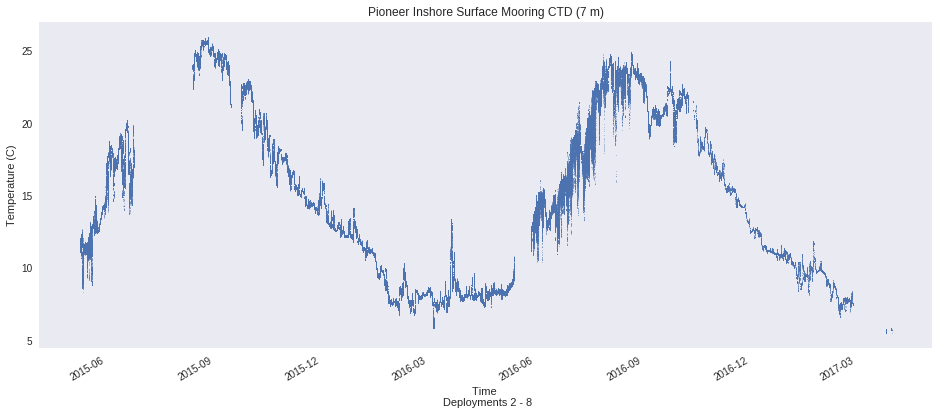

In [40]:
fig, ax = plt.subplots(1)
fig.set_size_inches(16, 6)
ds['ctdbp_seawater_temperature'].plot(linestyle = 'None', 
                                   marker='.', 
                                   markersize=1,
                                   ax=ax)
ax.grid()

plt.title('Pioneer Inshore Surface Mooring CTD (7 m)')
plt.ylabel('Temperature (C)')
plt.xlabel('Time \n Deployments 2 - 8')
plt.show()

One can see the gaps in data of temperature between deployments. Since this CTD sits at 7m, we will use Sea Surface Temperature (SST) from the Bulk Meteorology instrument to cross-validate this time series (see further below).

Next, let's plot a timeseries of salinity for the entire record

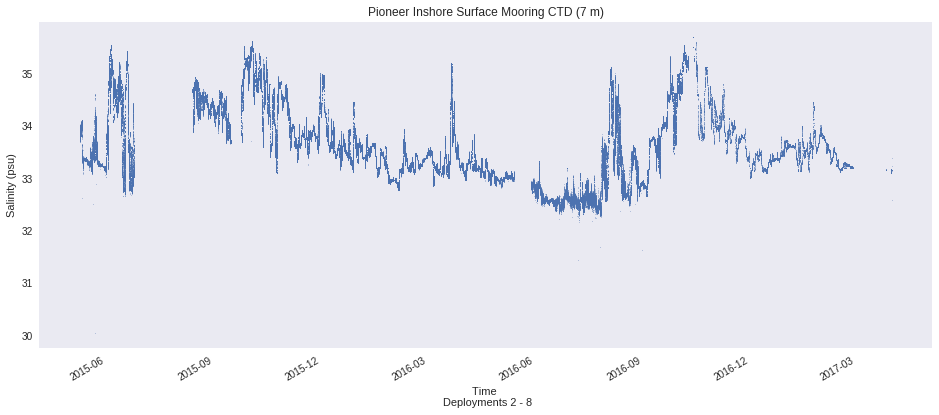

In [41]:
fig, ax = plt.subplots(1)
fig.set_size_inches(16, 6)
ds['practical_salinity'].plot(linestyle = 'None', 
                                   marker='.', 
                                   markersize=1,
                                   ax=ax)
ax.grid()

plt.title('Pioneer Inshore Surface Mooring CTD (7 m)')
plt.ylabel('Salinity (psu)')
plt.xlabel('Time \n Deployments 2 - 8')
plt.show()

Again, one can see the gaps in salinity between deployments.Again, we will use Sea Surface Salinity (SSS) from the Bulk Meteorology instrument to cross-validate this time series (see further below).

Next, we will move on to the Bulk Meteorology Instrument Package from the Inshore Surface Mooring. From this instrument, we will grab and plot timeseries of SST, SSS, wind speed/direction, and surface current speed/direction.

In [43]:
#THREDDS server URL insert under "url"
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/jRudzin@rsmas.miami.edu/20180524T154603-CP03ISSM-SBD11-06-METBKA000-recovered_host-metbk_a_dcl_instrument_recovered/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180524T154603-CP03ISSM-SBD11-06-METBKA000-recovered_host-metbk_a_dcl_instrument_recovered/deployment0005_CP03ISSM-SBD11-06-METBKA000-recovered_host-metbk_a_dcl_instrument_recovered_20161011T133933.739000-20170615T155538.228000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180524T154603-CP03ISSM-SBD11-06-METBKA000-recovered_host-metbk_a_dcl_instrument_recovered/deployment0005_CP03ISSM-RID26-04-VELPTA000-recovered_host-velpt_ab_dcl_instrument_recovered_20161011T134500-20170615T154519.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180524T154603-CP03ISSM-SBD11-06-METBKA000-recovered_host-metbk_a_dcl_instrument_recovered/deployment0004_CP03ISSM-SBD11-06-METBKA000-recovered_host-metbk_a_dcl_instrument_recovered_20160528T144303.191000-20161015T121318.643000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi

Load the list of NetCDF files into xarray. Note that this datasets has two dimensions, time and bin. Some variables are dimensioned along just time, others along both time and bin number. The data from the meterology instrument (metbk) are located at every other file in the list above. The other files are from the single point velocity instrument. Thus, the code below concatenates data from every other file to create a full data record from metbk.

In [44]:
ds = xr.open_mfdataset(datasets[::2])
ds = ds.swap_dims({'obs': 'time'})
#ds = ds.chunk({'time': 100})
ds = ds.sortby('time') # data from different deployments can overlap so we want to sort all data by time stamp.
ds

<xarray.Dataset>
Dimensions:                               (time: 1072499)
Coordinates:
    obs                                   (time) int64 0 1 2 3 4 5 6 7 8 9 ...
  * time                                  (time) datetime64[ns] 2015-05-09T00:57:49.569000448 ...
    lat                                   (time) float64 40.36 40.36 40.36 ...
    lon                                   (time) float64 -70.89 -70.89 ...
Data variables:
    deployment                            (time) int32 2 2 2 2 2 2 2 2 2 2 2 ...
    id                                    (time) |S64 '27dbbfd2-0587-4216-982d-ddc203daddb4' ...
    air_temperature                       (time) float32 13.326 13.348 ...
    barometric_pressure                   (time) float32 1022.87 1022.87 ...
    dcl_controller_timestamp              (time) object 'empty' 'empty' ...
    driver_timestamp                      (time) datetime64[ns] 2017-10-24T19:14:31.670995968 ...
    eastward_wind_velocity                (time) float32 -1.7

Now, let's plot some time series from this instrument. First, let's plot SST and SSS to validate the 7m CTD temperature and salinity..

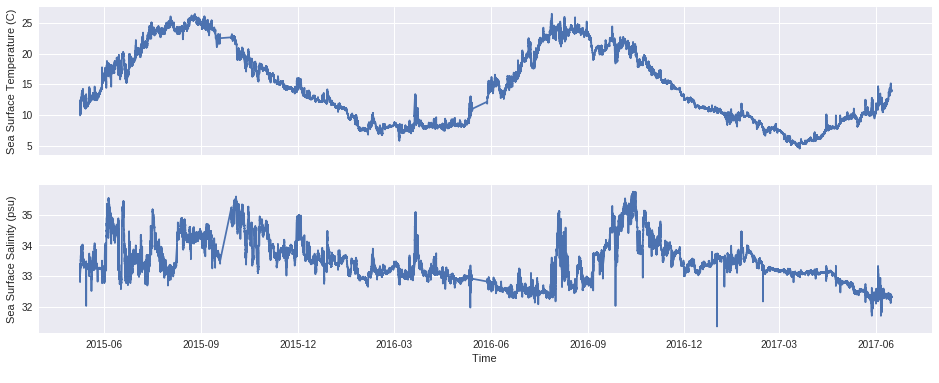

In [84]:
plt.close()
fig, axes = plt.subplots(2, sharex=True)
fig.set_size_inches(16, 6)

axes[0].plot(ds['time'].data,ds['sea_surface_temperature'])
axes[0].set_ylabel('Sea Surface Temperature (C)')

axes[1].plot(ds['time'].data,ds['met_salsurf'])
axes[1].set_ylabel('Sea Surface Salinity (psu)')


plt.xlabel('Time \n')
plt.show()

The overall trend in SST is captured in the 7m CTD with the peak temperatures occuring in both September 2015 and 2016 and minimum temperatures in March 2016 and 2017.

The overall trend in SSS is captured in the 7m CTD, especially the very salty peak in fall 2016. The very fresh dip in SSS observed on 01-2017 is not captured within the 7m CTD on the same mooring. Hence, it might be that this is a fresh water surface lense possibly induced by rainfall or river discharge.

In [0]:
import numpy as np

Let's also do a quick timeseries of the full record of wind speed, wind direction, current speed, and current direction from the meteorology instrument package.

In [0]:
X=ds['time'].data
Y=np.ones(X.shape)
uwind=ds['eastward_wind_velocity'].data
vwind=ds['northward_wind_velocity'].data

ucurr=ds['eastward_velocity'].data
vcurr=ds['northward_velocity'].data

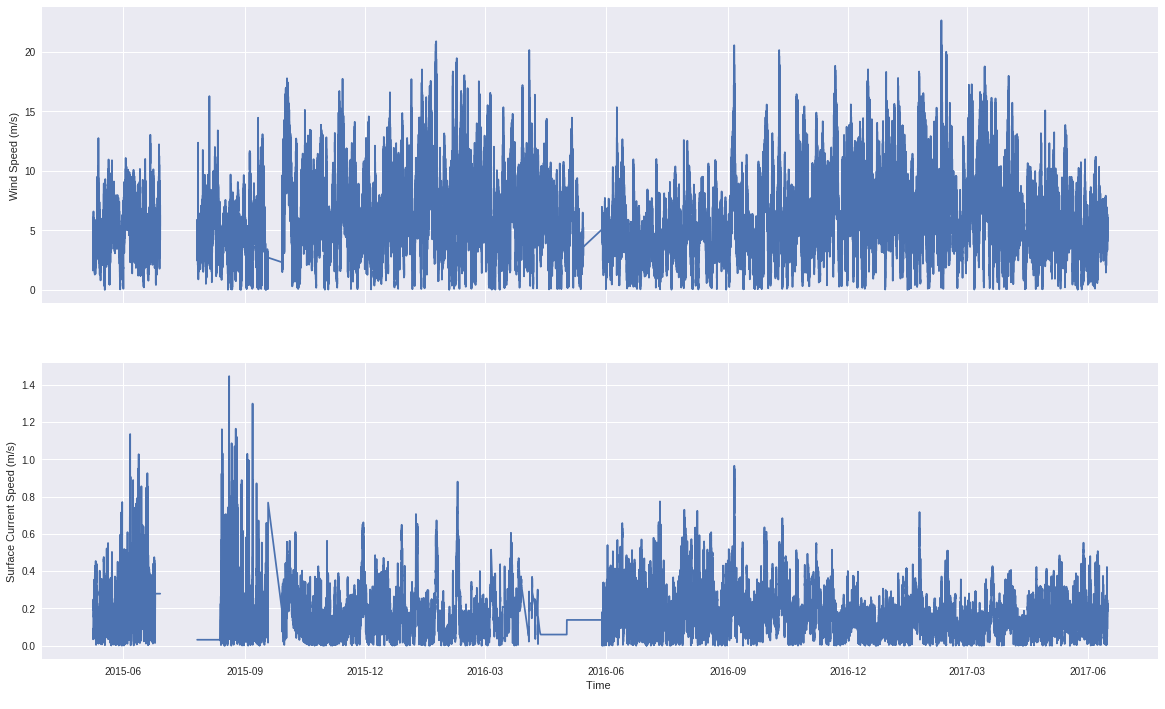

In [21]:
plt.close()
fig, axes = plt.subplots(2, sharex=True)
fig.set_size_inches(20, 12)

axes[0].plot(ds['time'].data,ds['met_relwind_speed'])
axes[0].set_ylabel('Wind Speed (m/s)')

#Q=plt.quiver(X,Y,uwind,vwind,units='width')

#axes[1].plot(ds['time'].data,ds['met_relwind_direction'])
#axes[1].set_ylabel('3m Wind Direction (deg)')

#axes[1].plot.quiver(X, Y, uwind, vwind, units='width')
#axes[1].set_ylabel('Wind Direction (deg)')

axes[1].plot(ds['time'].data,ds['met_current_speed'])
axes[1].set_ylabel('Surface Current Speed (m/s)')

#Q=plt.quiver(X,Y,ucurr,vcurr,units='width')

#axes[3].plot(ds['time'].data,ds['met_current_direction'])
#axes[3].set_ylabel('Surface Current Direction (deg)')
#axes[3].plot.quiver(X, Y, ucurr, vcurr, units='width')
#axes[3].set_ylabel('Surface Current Direction (deg)')


plt.xlabel('Time \n')
plt.show()

Lastly, let's plot the full data record from an ADCP that is on the Central Surface Mooring. This one was chosen given the Inshore Surface Moorings' ADCP does not cover the case study at the end of this report.

In [24]:
#THREDDS server URL insert under "url"
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/jRudzin@rsmas.miami.edu/20180524T135503-CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180524T135503-CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument/deployment0009_CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument_20180324T220241.030000-20180328T120239.100000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180524T135503-CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument/deployment0008_CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument_20171029T150337.406000-20171220T200639.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu/20180524T135503-CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument/deployment0007_CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument_20170609T150239.780000-20170919T180127.262000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin@rsmas.miami.edu

There was an issue concatenating Deployment 1 data with the rest of the deployment data so it was left out. Presented will be data from Deployments 2-7 as the "full" data record.

In [25]:
ds = xr.open_mfdataset(datasets[0:6])
ds = ds.swap_dims({'obs': 'time'})
ds = ds.sortby('time')
ds

<xarray.Dataset>
Dimensions:                                 (bin: 36, time: 6219)
Coordinates:
    obs                                     (time) int64 0 1 2 3 4 5 6 7 8 9 ...
  * time                                    (time) datetime64[ns] 2014-12-13T19:06:56.408999936 ...
    lat                                     (time) float64 dask.array<shape=(6219,), chunksize=(6219,)>
    lon                                     (time) float64 dask.array<shape=(6219,), chunksize=(6219,)>
Dimensions without coordinates: bin
Data variables:
    deployment                              (time) int32 dask.array<shape=(6219,), chunksize=(6219,)>
    id                                      (time) |S64 dask.array<shape=(6219,), chunksize=(6219,)>
    bit_result_demod_0                      (time) float32 dask.array<shape=(6219,), chunksize=(6219,)>
    bit_result_demod_1                      (time) float32 dask.array<shape=(6219,), chunksize=(6219,)>
    bit_result_timing                       (time) f

Note that the ADCP variable "bin-depth" does not exist. Also, there is no pressure data. Thus, to continue with the dataset a bin depths were estimated from the deployment depth and number of bins. In correspondence with Craig Risien (OSU), he stated that this issue was fixed for newer deployments.

In [0]:
time = ds['time'].data
#bin_depths = ds['bin_depths'].data.T
east = ds['adcps_pd12_eastward_seawater_velocity'].data.T
north = ds['adcps_pd12_northward_seawater_velocity'].data.T
up = ds['upward_earth_seawater_velocity'].data.T

To screen out surface noise velocities we will set the colorbar limit to the 90th percentile of the data.

In [0]:
lim_east = float("%2.2f" % np.nanpercentile(east, 90))
lim_north = float("%2.2f" % np.nanpercentile(north, 90))
lim_up = float("%2.2f" % np.nanpercentile(up, 90))
u_v_w = max([lim_east, lim_north, lim_up])

Plotting the velocity data and creating a depth range within this code. Note, the deployment depth of 133m is shown in the ymax and ylim parts of this code and is used to create an array for depth named "bin_depths".

(36, 6219)


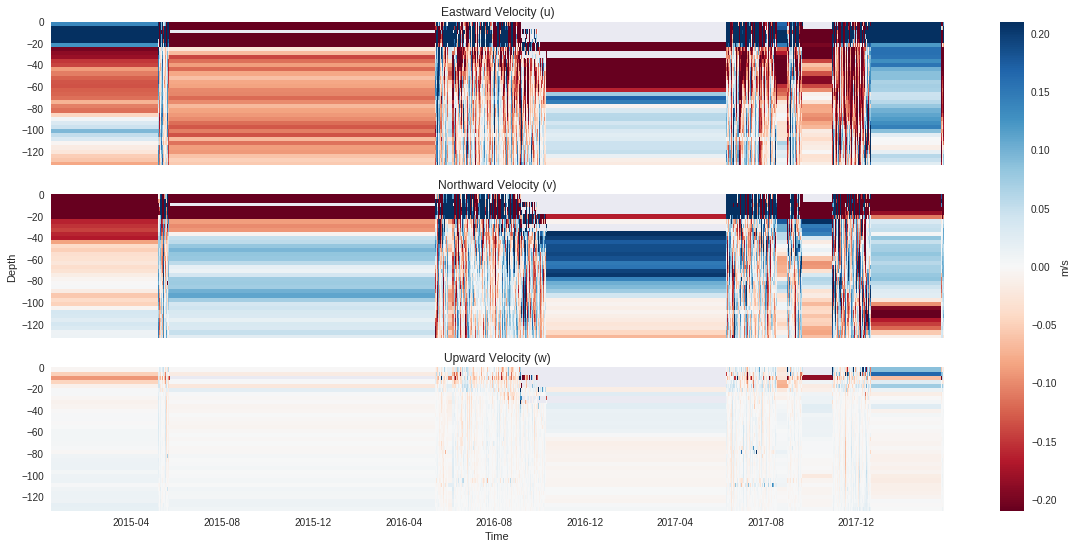

In [30]:
plt.close()
fig, axes = plt.subplots(3, sharex=True)
fig.set_size_inches(20, 9)

ny, nx = 36,len(time)
xmin, xmax = 0, len(time)
ymin, ymax = -133, 0
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
x_i, y_i = np.meshgrid(time, yi)
bin_depths = np.asarray(y_i)
print bin_depths.shape

p0 = axes[0].pcolormesh(time, bin_depths, east, cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[0].set_ylim(-133,0)
axes[0].set_title('Eastward Velocity (u)')
#axes[0].invert_yaxis()

p1 = axes[1].pcolormesh(time, bin_depths, north, cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylim(-133,0)
#axes[1].invert_yaxis()
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time, bin_depths, up, cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[2].set_title('Upward Velocity (w)')
axes[2].set_ylim(-133,0)
#axes[2].invert_yaxis()
axes[2].set_xlabel('Time')

fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

Notice the large gaps between the "noisy" data. These are actually interpolated from the plotting code. The noisy data is "good" data for differing deployments. Let's zoom in on these to get a better look since this plot doesn't show velocities clearly. Plotting the time variable helps to figure out the index to plot at these times.

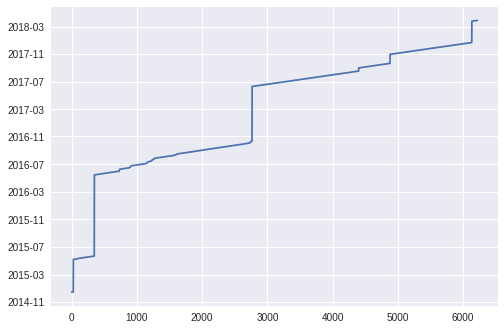

In [31]:
plt.plot(time)

Let's take a look at time 3000-4000

(36, 6219)


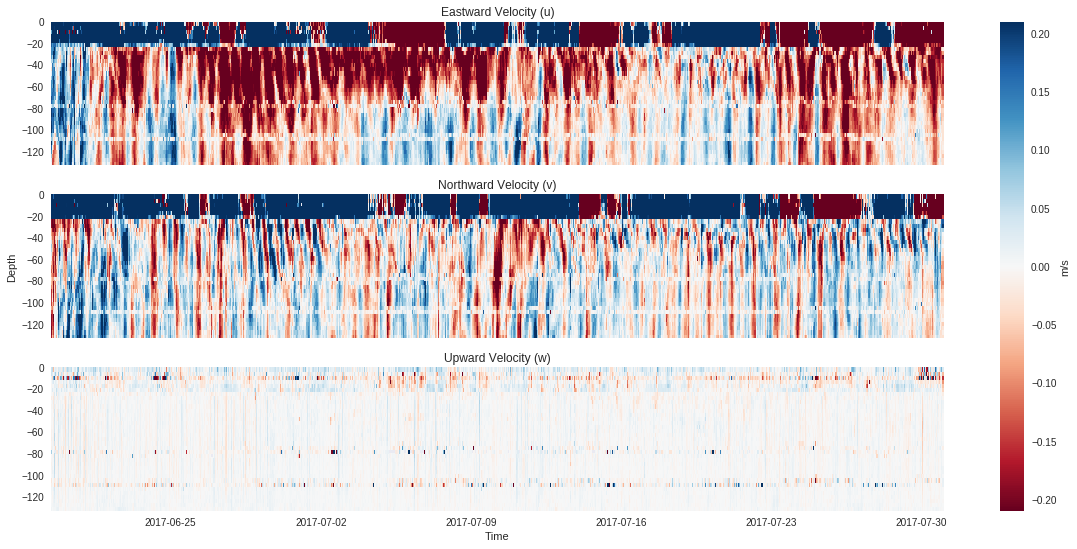

In [33]:
plt.close()
fig, axes = plt.subplots(3, sharex=True)
fig.set_size_inches(20, 9)

ny, nx = 36,len(time)
xmin, xmax = 0, len(time)
ymin, ymax = -133, 0
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
x_i, y_i = np.meshgrid(time, yi)
bin_depths = np.asarray(y_i)
print bin_depths.shape

p0 = axes[0].pcolormesh(time[3000:4000], bin_depths[:,3000:4000], east[:,3000:4000], cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[0].set_ylim(-133,0)
axes[0].set_title('Eastward Velocity (u)')
#axes[0].invert_yaxis()

p1 = axes[1].pcolormesh(time[3000:4000], bin_depths[:,3000:4000], north[:,3000:4000], cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylim(-133,0)
#axes[1].invert_yaxis()
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time[3000:4000], bin_depths[:,3000:4000], up[:,3000:4000], cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[2].set_title('Upward Velocity (w)')
axes[2].set_ylim(-133,0)
#axes[2].invert_yaxis()
axes[2].set_xlabel('Time')

fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

Note that ,near the surface, data becomes quite noisy, which is expected. This ADCP data was first looked at on the OOI Data Portal and these data seem to be similar but one issue that was found that the "bin_depth" variable is not plotted accurately in the Data Portal. [This figure](https://ibb.co/dROpvo) is an example of a figure from the Data Portal of eastward velocity from this ADCP for the time of the case study that will be explored. The "0" bin_depth should technically be closest to the instrument. SInce this instrument is at the bottom looking up, the 0 bin_depth should be at the bottom of the y axis yet its at the top. Just something to keep in mind when getting a "first view" of data using the Data Portal.

Now lets move on to the specific case study of Extratropical Storm Hermine (2016)

## 5. Case Study of Extratropical Storm Hermine (2016)

All of the data chosen and showed thus far are to further look into the upper ocean and atmospheric response that occured during the passage of Extratropical Storm Hermine (2016) that passed very close over the Pioneer Mooring Array during the first week of September 2016.

First, lets look at the temperature and salinity response from the 7m CTD

In [35]:
#THREDDS server URL insert under "url"
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/jRudzin-rsmas-miami/20180524T192031-CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin-rsmas-miami/20180524T192031-CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/deployment0004_CP03ISSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered_20160903T000024-20160909T234819.nc']

In [37]:
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.sortby('time')
ds

<xarray.Dataset>
Dimensions:                                  (time: 12283)
Coordinates:
    obs                                      (time) int32 0 1 2 3 4 5 6 7 8 ...
  * time                                     (time) datetime64[ns] 2016-09-03T00:00:24 ...
    pressure                                 (time) float64 dask.array<shape=(12283,), chunksize=(12283,)>
    lat                                      (time) float64 dask.array<shape=(12283,), chunksize=(12283,)>
    lon                                      (time) float64 dask.array<shape=(12283,), chunksize=(12283,)>
Data variables:
    deployment                               (time) int32 dask.array<shape=(12283,), chunksize=(12283,)>
    id                                       (time) |S64 dask.array<shape=(12283,), chunksize=(12283,)>
    conductivity                             (time) float64 dask.array<shape=(12283,), chunksize=(12283,)>
    ctd_time                                 (time) datetime64[ns] dask.array<shape=(12

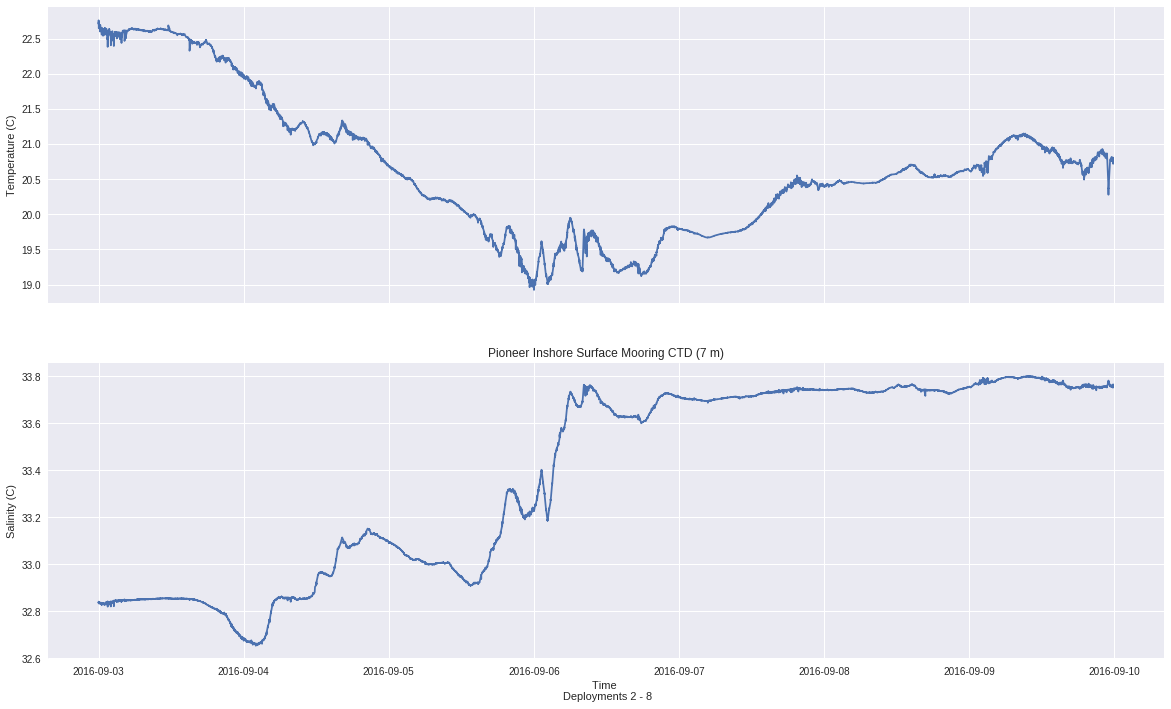

In [38]:
plt.close()
fig, axes = plt.subplots(2, sharex=True)
fig.set_size_inches(20, 12)

axes[0].plot(ds['time'].data,ds['ctdbp_seawater_temperature'])
axes[0].set_ylabel('Temperature (C)')

axes[1].plot(ds['time'].data,ds['practical_salinity'])
axes[1].set_ylabel('Salinity (C)')

plt.title('Pioneer Inshore Surface Mooring CTD (7 m)')
plt.xlabel('Time \n Deployments 2 - 8')
plt.show()

Through these plots, we can clearly see that the storm initiated upper ocean cooling around the 3rd of September and reached a maximum of 3.5C cooling by September 6. This was accompanied by a "saltening" at 7m where deeper, saltier waters were entrained from below. An approximate 1psu change in salinity is observed from Sep 4 - Sep 6. A slight freshening of ~0.2psu is observed from Sep 6-7 which may be due to the storms' precipitation mixing down to the CTD.

Let's take a look at the wind speed/dir, current speed/dir, and precipitation to match up to these time series.

In [45]:
#THREDDS server URL insert under "url"
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/jRudzin-rsmas-miami/20180524T194844-CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin-rsmas-miami/20180524T194844-CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0004_CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20160903T000058.391000-20160910T095951.508000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin-rsmas-miami/20180524T194844-CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0004_CP03ISSM-RID26-04-VELPTA000-telemetered-velpt_ab_dcl_instrument_20160903T000044-20160910T094541.nc']

In [46]:
datasets[0]

u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin-rsmas-miami/20180524T194844-CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0004_CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20160903T000058.391000-20160910T095951.508000.nc'

In [47]:
ds = xr.open_dataset(datasets[0])
ds = ds.swap_dims({'obs': 'time'})
ds = ds.sortby('time')
ds


<xarray.Dataset>
Dimensions:                               (time: 10680)
Coordinates:
    obs                                   (time) int32 0 1 2 3 4 5 6 7 8 9 ...
  * time                                  (time) datetime64[ns] 2016-09-03T00:00:58.390999552 ...
    lat                                   (time) float64 40.36 40.36 40.36 ...
    lon                                   (time) float64 -70.88 -70.88 ...
Data variables:
    deployment                            (time) int32 4 4 4 4 4 4 4 4 4 4 4 ...
    id                                    (time) |S64 'ec68d66e-9aeb-469f-9b17-088f66a4af63' ...
    air_temperature                       (time) float32 20.795 20.773 ...
    barometric_pressure                   (time) float32 1018.87 1018.81 ...
    dcl_controller_timestamp              (time) object 'empty' 'empty' ...
    driver_timestamp                      (time) datetime64[ns] 2017-10-24T01:33:34.658176 ...
    eastward_wind_velocity                (time) float32 -5.42 -5.

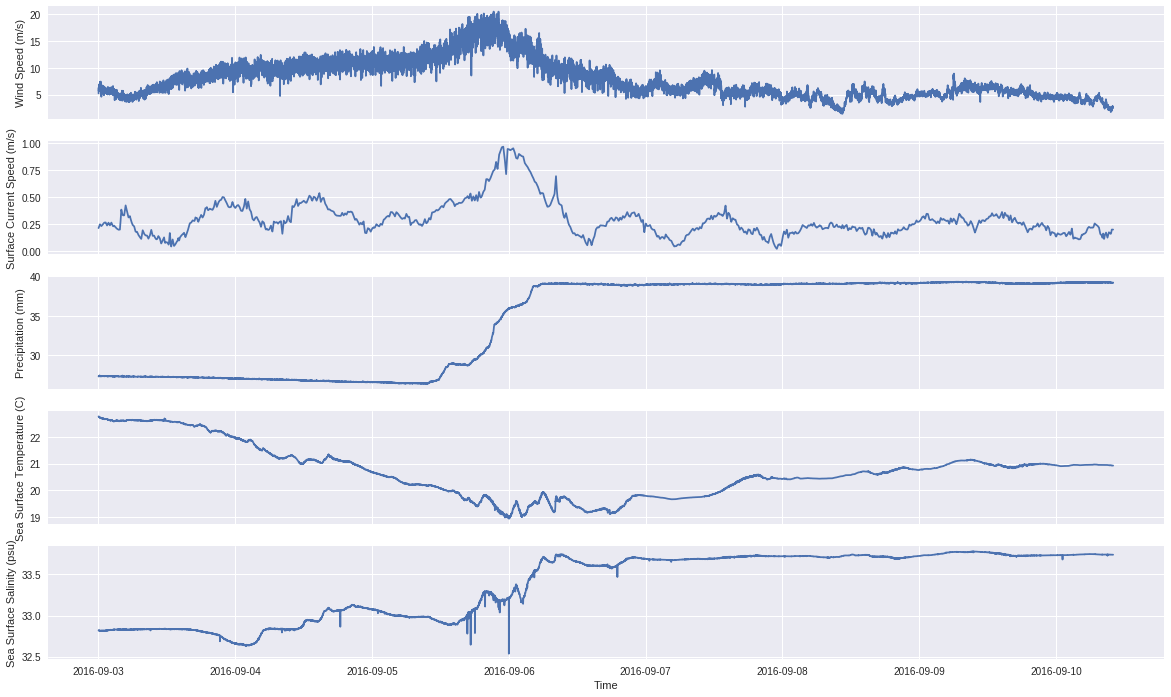

In [55]:
plt.close()
fig, axes = plt.subplots(5, sharex=True)
fig.set_size_inches(20, 12)

axes[0].plot(ds['time'].data,ds['met_relwind_speed'])
axes[0].set_ylabel('Wind Speed (m/s)')

#Q=plt.quiver(X,Y,uwind,vwind,units='width')

#axes[1].plot(ds['time'].data,ds['met_relwind_direction'])
#axes[1].set_ylabel('Wind Direction (deg)')

#axes[1].plot.quiver(X, Y, uwind, vwind, units='width')
#axes[1].set_ylabel('Wind Direction (deg)')

axes[1].plot(ds['time'].data,ds['met_current_speed'])
axes[1].set_ylabel('Surface Current Speed (m/s)')

#axes[3].plot(ds['time'].data,ds['met_current_direction'])
#axes[3].set_ylabel('Surface Current Direction (deg)')

axes[2].plot(ds['time'].data,ds['precipitation'])
axes[2].set_ylabel('Precipitation (mm)')

#axes[3].plot(ds['time'].data,ds[''])
#axes[3].set_ylabel('Net Heat Flux (W/m^2)')

axes[3].plot(ds['time'].data,ds['sea_surface_temperature'])
axes[3].set_ylabel('Sea Surface Temperature (C)')

axes[4].plot(ds['time'].data,ds['met_salsurf'])
axes[4].set_ylabel('Sea Surface Salinity (psu)')

plt.xlabel('Time')
plt.show()

The passage of the storm is clearly seen in wind speed, surface current speed, and in precipitation. Maximum wind speed and current speed show up right before September 6 whereas precipitation hits a maximum in the early morning of September 6. SST cooling is the same magnitude as the 7m CTD however the freshening of SSS is quite larger than 7m salinity (33.2 psu vs 32.5 psu).

Another interesting phenomenon that occurs during an intense wind forcing event is the prevalence of upper ocean currents called near-inertial oscillations (NIOs) (Price, 1981). These are osciallations that occur just off the frequency of the local inertial period. Here, at ~40N, the inertial period (IP) is roughly 18.5 hours (T=2pi/f, where f is the Coriolis parameter). Let's look at the data from the ADCP to see if these are prevalent. 


Price, J. F., 1981: Upper ocean response to a hurricane. J. Phys. Oceanogr., 11, 153–175.

In [54]:
#THREDDS server URL insert under "url"
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/jRudzin-rsmas-miami/20180524T202300-CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument/catalog.html'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jRudzin-rsmas-miami/20180524T202300-CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument/deployment0005_CP01CNSM-MFD35-01-ADCPTF000-telemetered-adcpt_acfgm_pd8_dcl_instrument_20160903T000147.700000-20160909T230142.921000.nc']

In [56]:
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.sortby('time')
ds

<xarray.Dataset>
Dimensions:                                 (bin: 36, time: 159)
Coordinates:
    obs                                     (time) int32 0 1 2 3 4 5 6 7 8 9 ...
  * time                                    (time) datetime64[ns] 2016-09-03T00:01:47.699999744 ...
    lat                                     (time) float64 dask.array<shape=(159,), chunksize=(159,)>
    lon                                     (time) float64 dask.array<shape=(159,), chunksize=(159,)>
Dimensions without coordinates: bin
Data variables:
    deployment                              (time) int32 dask.array<shape=(159,), chunksize=(159,)>
    id                                      (time) |S64 dask.array<shape=(159,), chunksize=(159,)>
    bit_result_demod_0                      (time) float32 dask.array<shape=(159,), chunksize=(159,)>
    bit_result_demod_1                      (time) float32 dask.array<shape=(159,), chunksize=(159,)>
    bit_result_timing                       (time) float32 dask.a

In [0]:
time = ds['time'].data
#bin_depths = ds['bin_depths'].data.T
east = ds['adcps_pd12_eastward_seawater_velocity'].data.T
north = ds['adcps_pd12_northward_seawater_velocity'].data.T
up = ds['upward_earth_seawater_velocity'].data.T

In [0]:
lim_east = float("%2.2f" % np.nanpercentile(east, 90))
lim_north = float("%2.2f" % np.nanpercentile(north, 90))
lim_up = float("%2.2f" % np.nanpercentile(up, 90))
u_v_w = max([lim_east, lim_north, lim_up])

(36, 159)


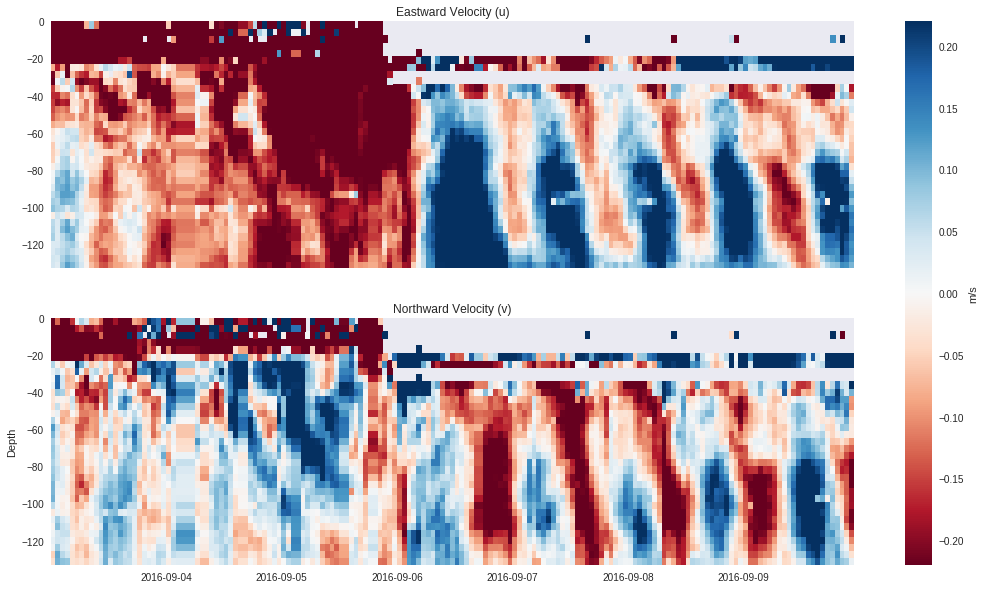

In [68]:
plt.close()
fig, axes = plt.subplots(2, sharex=True)
fig.set_size_inches(18, 10)

ny, nx = 36,len(time)
xmin, xmax = 0, len(time)
ymin, ymax = -133, 0
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
x_i, y_i = np.meshgrid(time, yi)
bin_depths = np.asarray(y_i)
print bin_depths.shape

p0 = axes[0].pcolormesh(time, bin_depths, east, cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[0].set_ylim(-133,0)
axes[0].set_title('Eastward Velocity (u)')
#axes[0].invert_yaxis()

p1 = axes[1].pcolormesh(time, bin_depths, north, cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylim(-133,0)
#axes[1].invert_yaxis()
axes[1].set_ylabel('Depth')

#p2 = axes[2].pcolormesh(time, bin_depths, up, cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
#axes[2].set_title('Upward Velocity (w)')
#axes[2].set_ylim(-133,0)
##axes[2].invert_yaxis()
#axes[2].set_xlabel('Time')


fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

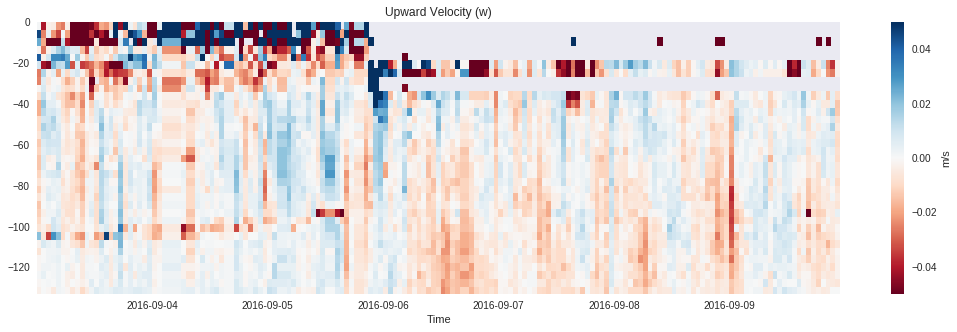

In [92]:
plt.close()
fig, axes = plt.subplots()
fig.set_size_inches(18, 5)


p = axes.pcolormesh(time, bin_depths, up, cmap='RdBu',vmin=-0.05,vmax=0.05)
axes.set_title('Upward Velocity (w)')
axes.set_ylim(-133,0)
##axes[0].invert_yaxis()
axes.set_xlabel('Time')

#bounds=[-0.05,-0.045,-0.04,-0.035,-0.03,-0.025,-0.02,-0.015,-0.01,-0.005,0,0.05,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,]
#bounds=[-0.015,-0.01,-0.005,0,0.05,0.01,0.015]

#bounds=np.linspace(-0.0001,0.0001, 20)

fig.colorbar(p,label='m/s')
#pyplot.clim(-0.015,0.015)
plt.show()

The storms' influence in the upper ocean is observed by current oscillations in the northward and eastward velocity components starting on Sep 6. Before this time, the dominant direction of the current is westward. Also after the storm passage on Sep 6, there is a strong signature of upwelling, followed by pulses of downwelling and upwelling. This upwelling after storm passage entrains cooler water from below and cools the upper ocean and SST as seen in the CTD and the CT on the Bulk Meteorology Instrument.


 

## 6. Notable Results and Actions Needed



For entire data record:
*   7m temperature and salinity from CTD corresponds with SST and SSS from Bulk Met Instrument
*   Surface winds and surface currents visually correlate with each other
*   No ADCP available on Inshore Surface Mooring so ADCP on Central Surface Mooring was used
    * Several gaps in ADCP data, expected data gap near surface
    * No vertical coordinate in .nc data files (bin_depths or pressure) in telemetered data
    * Initial attempt at getting vertical coordinate to get a first look, more indepth analysis needed to get better idea of depths
    * No "bad beams" variable in .nc file either to get idea of data accuracy
    * First-look plotting on OOI Data Portal plots y-axis (bins) upside down
    
For case study:

*   Peak wind speed of 20 m/s and peak surface current speed ~ 1 m/s
*   ~3.5C ocean temperature cooling at both 7m CTD and SST measurement in Bulk Met Instruments
*   Freshwater lense present at sea surface as shown by Bulk Met Instrument which is not prevalent at 7m CTD (~ 1 psu difference between instruments)
*   Freshwater lense must be result of increased precipitation from storm
*   Interesting current osciallations, believed to be NIOs, since frequency is shifted just below inertial period  (~18hr) and starts within 1/2 inertial period after storm passage. Creates upwelling and downwelling at same frequency of current oscillations





